<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Histogram Based Outlier Detection with Standard Scaler

This code template demonstrates outlier detection using the HBOS(Histogram Based Outlier Detection) Algorithm from the pyod library in python along with StandardScaler as a feature scaling technique.

### Required Packages

In [ ]:
!pip install pyod

In [69]:
import time
import warnings
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# from sklearn.manifold import Isomap
from pyod.models.hbos import HBOS
from sklearn.preprocessing import LabelEncoder,StandardScaler
warnings.filterwarnings("ignore")

### Initialization

Filepath of CSV file

In [100]:
file_path = ''

List of features which are  required for model training .

In [101]:
#x_values
features = []

In [102]:
#y_value
target = ''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [103]:
df=pd.read_csv(file_path)
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X.

In [104]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.

In [105]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature set.


In [106]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  
0  0.128539 -0.189115  0.133558 -0.021053  149.62  
1  0.167170  0.125895 -0.008983  0.014724    2.69  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66  
3  0.647376 -0.221929  0.062723  0.061458  123.50  
4 -0.206010  0.502292  0.219422  0.215153   69.99  

[5 rows x 30 columns]

### Data Rescaling
StandardScaler standardizes features by removing the mean and scaling to unit variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for parameters

In [107]:
X_Scaled=StandardScaler().fit_transform(X)
X_Scaled=pd.DataFrame(data = X_Scaled,columns = X.columns)
X_Scaled.head()

Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.193679  0.082637  0.331128  ...  0.326118 -0.024923  0.382854 -0.176911   
1 -0.063700  0.071253 -0.232494  ... -0.089611 -0.307377 -0.880077  0.162201   
2  0.639776  0.207373 -1.378675  ...  0.680975  0.337632  1.063358  1.456320   
3  0.192071  0.316018 -1.262503  ... -0.269855 -0.147443  0.007267 -0.304777   
4  0.479302 -0.226510  0.744326  ...  0.529939 -0.012839  1.100011 -0.220123   

        V24       V25       V26       V27       V28    Amount  
0  0.110507  0.246585 -0.392170  0.330892 -0.063781  0.244964  
1 -0.561131  0.320694  0.261069 -0.022256  0.044608 -0.342475  
2 -1.138092 -0.628537 -0.288447 -0.137137 -0.181021  1.160686  
3 -1.941027  1.241904 -0.460217  0.155396  0.186189  0.140534  
4  0.233250 -0.395202  1.041611  0.543620  0.651816 -0.073403  

[5 rows x 30 columns]

### Model

Histogram-based Outlier Score(HBOS): It is an unsupervised distance-based algorithm to capture the outliers. A suitable option for treating global outlier but not an impressive choice for local anomalies. When a data point is placed farther away from the rest of the data, then it is termed as a global outlier.
Whereas, the local oddity is a data point that lies in the limit of the entire data, but placed at a reasonable distance from its local neighbourhood. The algorithm assumes the features are completely independent(zero multicollinearity) of one another.

Refer [API](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.hbos) for parameters

In [108]:
model = HBOS(alpha=0.1, contamination=0.001, tol=0.5)
model.fit(X)

HBOS(alpha=0.1, contamination=0.001, n_bins=10, tol=0.5)

### Anomaly Prediction

In [109]:
result = X_Scaled.copy(deep=True)
result['Anomaly']=model.predict(X_Scaled)
result.head()

Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.193679  0.082637  0.331128  ... -0.024923  0.382854 -0.176911  0.110507   
1 -0.063700  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201 -0.561131   
2  0.639776  0.207373 -1.378675  ...  0.337632  1.063358  1.456320 -1.138092   
3  0.192071  0.316018 -1.262503  ... -0.147443  0.007267 -0.304777 -1.941027   
4  0.479302 -0.226510  0.744326  ... -0.012839  1.100011 -0.220123  0.233250   

        V25       V26       V27       V28    Amount  Anomaly  
0  0.246585 -0.392170  0.330892 -0.063781  0.244964        0  
1  0.320694  0.261069 -0.022256  0.044608 -0.342475        0  
2 -0.628537 -0.288447 -0.137137 -0.181021  1.160686        0  
3  1.241904 -0.460217  0.155396  0.186189  0.140534        0  
4 -0.395202  1.041611  0.543620  0.651816 -0.073403        0  

[5 rows x 31 columns]

### Anomaly Visualization

#### Bar Plot

<AxesSubplot:>

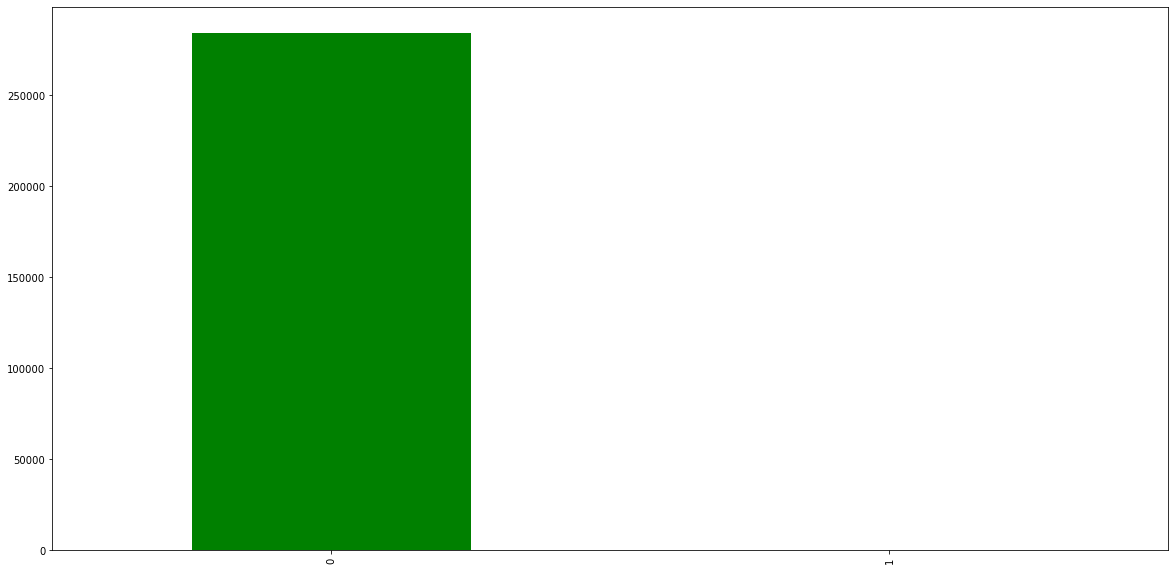

In [110]:
result['Anomaly'].value_counts().plot(kind='bar',color=['green','red'])

#### Pie Chart

In [111]:
fig = px.pie(result['Anomaly'],names=result['Anomaly'], title='Anomaly rate',)
fig.show()

#### Anomalies

In this part we will perform Dimensionality Reduction technique to visualize data. This can be performed using technique such as PCA or TSNE algorithms.

In [112]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(result.drop('Anomaly',axis=1))

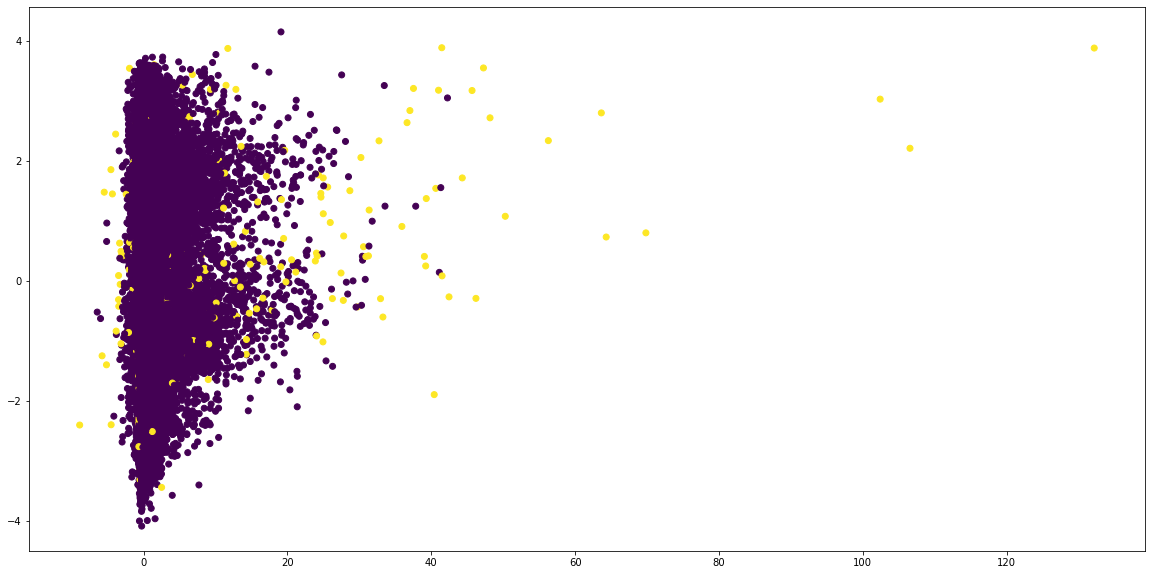

In [113]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x=pca_results[:,0],y=pca_results[:,1],c=result.iloc[:,result.columns.get_loc('Anomaly')])
plt.show()

#### Creator: Aishwarya Guntoju , Github: [Profile](https://github.com/DSAishwaryaG)